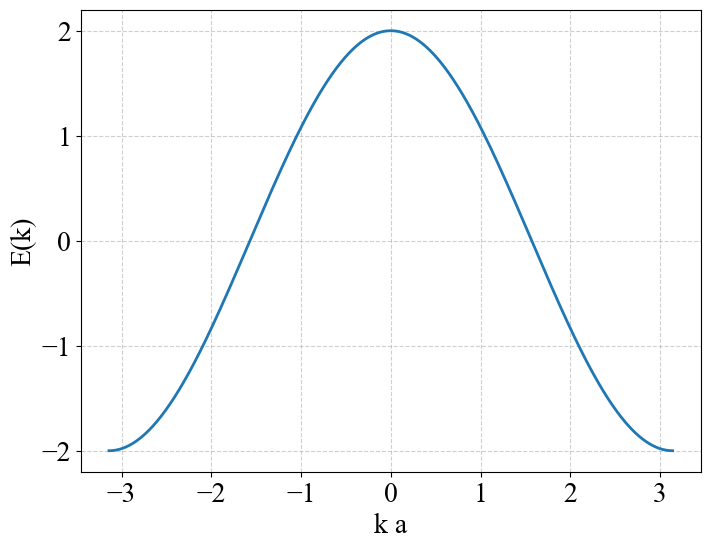

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# --- Setup and Definitions ---

# This configures the font for the entire plot.
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'font.size': 20,
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'axes.edgecolor': 'black'
})

# Define the constants from the Mathematica code
a = 1.0
t = 1.0

# --- Data Generation ---

# Create the data for the x-axis.
# We want to plot against "k a", so we create a range for k*a from -pi to pi.
# np.linspace creates an array of 500 evenly spaced points for a smooth curve.
ka = np.linspace(-np.pi, np.pi, 500)

# Calculate the function E(k) = 2*t*Cos(k*a)
E_k = 2 * t * np.cos(ka)

# --- Plotting ---

# Create a figure and an axes object to plot on
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the function E(k) versus k*a
ax.plot(ka, E_k, linewidth=2)

# Set the labels for the x and y axes (equivalent to FrameLabel)
ax.set_xlabel("k a")
ax.set_ylabel("E(k)")

# Add a grid for better readability
ax.grid(True, linestyle='--', alpha=0.6)

# Display the final plot
plt.show()

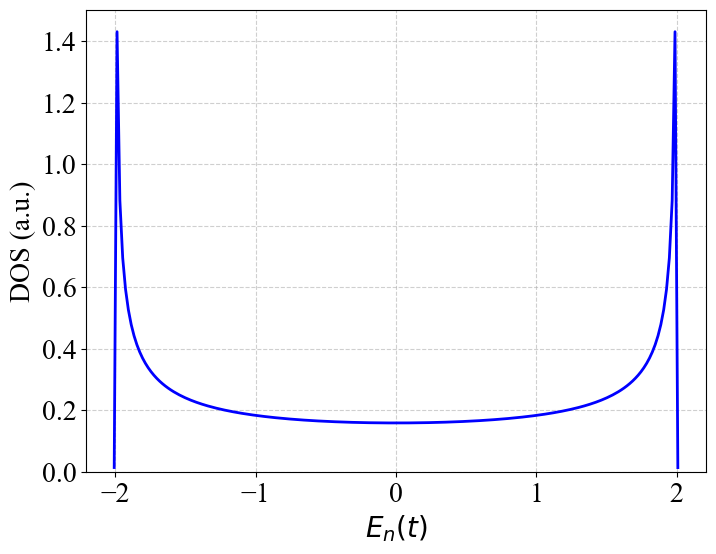

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Setup and Definitions ---

# Set plot style to match Mathematica's FrameStyle
# This configures the font and colors for the plot elements.
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'font.size': 20,
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'axes.edgecolor': 'black'
})

# Define the constants (assuming a=1 and t=1 as they are not defined)
a = 1.0
t = 1.0

# --- Data Generation ---

# Generate the sequence of k values from -Pi/a to Pi/a with a step of 0.001
# This is the direct equivalent of Mathematica's Table iterator.
k = np.arange(-np.pi / a, np.pi / a, 0.001)

# Calculate the list of eigenvalues, E(k) = 2*t*Cos(k*a)
eigenvals = 2 * t * np.cos(k * a)

# The Flatten[EIGENVALS] command is not needed, as the NumPy calculation
# already produces a flat, one-dimensional array.

# --- Plotting ---

# Create a figure and an axes object
fig, ax = plt.subplots(figsize=(8, 6))

# Create the smooth histogram (Kernel Density Estimate plot)
# This is the Python equivalent of SmoothHistogram.
# The 'bw_adjust' parameter controls the smoothness, similar to the '0.01' in Mathematica.
# A smaller value creates a more detailed, less smooth curve.
sns.kdeplot(eigenvals, ax=ax, linewidth=2, color='blue', bw_adjust=0.01)

# Set the labels for the x and y axes, using LaTeX for the subscript
# This corresponds to the FrameLabel argument.
ax.set_xlabel('$E_n(t)$')
ax.set_ylabel('DOS (a.u.)')

# Add a grid for clarity
ax.grid(True, linestyle='--', alpha=0.6)

# Display the final plot
plt.show()

In [4]:
import numpy as np

# --- Setup and Definitions ---

# Define the model parameters
L = 500      # Number of sites in the chain
ep = 0.0     # On-site energy (diagonal elements)
t = 1.0      # Hopping energy (off-diagonal for nearest neighbors)

# The variables 'a' and 'tol' from the Mathematica code are not
# strictly needed in this optimized version, but are kept for context.
a = 1.0      # Lattice constant (distance between sites)
tol = 0.01

# --- Hamiltonian Construction ---

# 1. Start with a matrix of zeros
H = np.zeros((L, L))

# 2. Set the diagonal elements to the on-site energy 'ep'
# The 'fill_diagonal' function modifies the array in-place.
np.fill_diagonal(H, ep)

# 3. Set the nearest-neighbor hopping energy 't' for the off-diagonals.
# This sets the elements H[i, i+1] and H[i+1, i] to 't'.
# np.arange(L-1) creates indices [0, 1, ..., L-2].
indices = np.arange(L - 1)
H[indices, indices + 1] = t  # Upper off-diagonal
H[indices + 1, indices] = t  # Lower off-diagonal


# --- (Optional) Print the top-left corner of the matrix to verify ---
# For L=500, printing the whole matrix isn't practical.
print("Hamiltonian matrix H (top-left 5x5 corner):")
print(H[0:5, 0:5])

Hamiltonian matrix H (top-left 5x5 corner):
[[0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 1.]
 [0. 0. 0. 1. 0.]]


In [11]:
import numpy as np

# Define parameters
L = 500
ep = 0.0
t = 1.0

# Build the Hamiltonian in one line by adding the diagonal and off-diagonals
H_alternative = (np.diag(np.full(L, ep)) +
                 np.diag(np.full(L - 1, t), k=1) +
                 np.diag(np.full(L - 1, t), k=-1))

# print("Alternative H (top-left 5x5 corner):")
# print(H_alternative[0:5, 0:5])

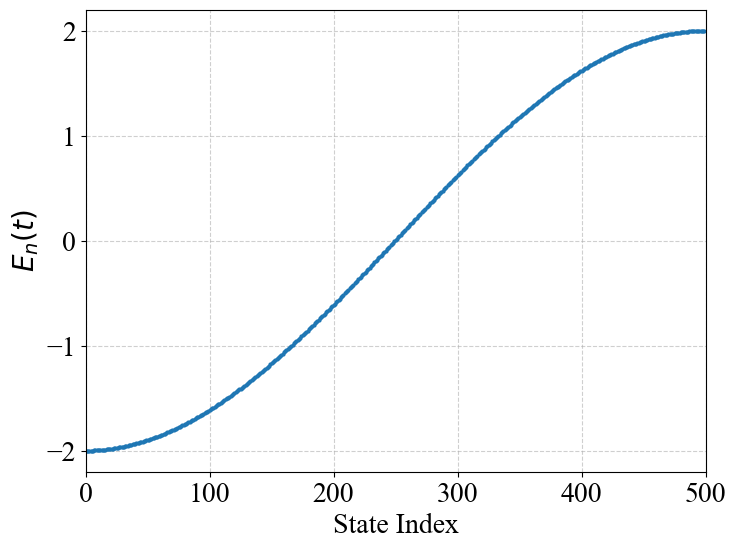

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Construct the Hamiltonian (from the previous step) ---

# Define the model parameters
L = 500      # Number of sites in the chain
ep = 0.0     # On-site energy (diagonal elements)
t = 1.0      # Hopping energy (off-diagonal for nearest neighbors)

# Create the Hamiltonian matrix H
# Start with a matrix of zeros and add the diagonal and off-diagonal elements.
H = (np.diag(np.full(L, ep)) +
     np.diag(np.full(L - 1, t), k=1) +
     np.diag(np.full(L - 1, t), k=-1))


# --- 2. Calculate and Plot the Eigenvalues (new part) ---

# Calculate the eigenvalues of the matrix H.
# np.linalg.eigvalsh is a specialized, fast function for real symmetric
# matrices (like our H) and conveniently returns the eigenvalues already sorted.
eigenvalues = np.linalg.eigvalsh(H)

# --- Plotting ---

# Set plot style to match Mathematica's FrameStyle
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'font.size': 20,
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'axes.edgecolor': 'black'
})

# Create a figure and an axes object
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the sorted eigenvalues.
# ax.plot() with a single list of values automatically plots them
# against their index (0, 1, 2, ...), which is what ListPlot does.
ax.plot(eigenvalues, marker='o', linestyle='None', markersize=2)

# Set the labels for the x and y axes, using LaTeX for the subscript
ax.set_xlabel("State Index")
ax.set_ylabel("$E_n(t)$")

# Add a grid and set axis limits
ax.grid(True, linestyle='--', alpha=0.6)
ax.set_xlim(0, L) # Set x-axis to go from 0 to L

# Display the final plot
plt.show()

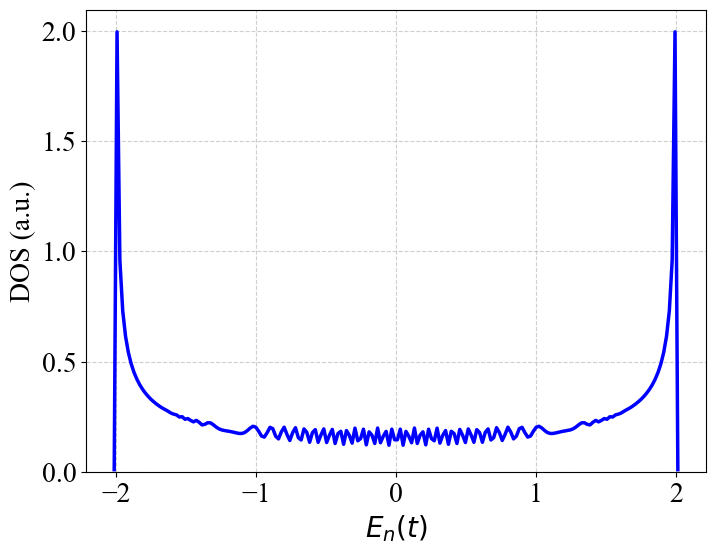

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Construct the Hamiltonian ---

# Define the model parameters
L = 500      # Number of sites in the chain
ep = 0.0     # On-site energy
t = 1.0      # Hopping energy

# Build the tridiagonal Hamiltonian matrix H
H = (np.diag(np.full(L, ep)) +
     np.diag(np.full(L - 1, t), k=1) +
     np.diag(np.full(L - 1, t), k=-1))


# --- 2. Calculate the Eigenvalues ---

# Calculate the eigenvalues of H.
# eigvalsh is fast, efficient, and returns sorted eigenvalues.
eigenvalues = np.linalg.eigvalsh(H)


# --- 3. Plot the Smooth Histogram (Density of States) ---

# Set the plot style
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'font.size': 20,
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'axes.edgecolor': 'black'
})

# Create a figure and an axes object
fig, ax = plt.subplots(figsize=(8, 6))

# Create the smooth histogram (Kernel Density Estimate plot)
# This is the Python equivalent of SmoothHistogram and represents the DOS.
sns.kdeplot(eigenvalues, ax=ax, linewidth=2.5, color='blue', bw_adjust=0.01)

# Set the labels for the x and y axes, using LaTeX for the subscript
ax.set_xlabel('$E_n(t)$')
ax.set_ylabel('DOS (a.u.)')

# Add a grid for clarity
ax.grid(True, linestyle='--', alpha=0.6)

# Display the final plot
plt.show()